In [14]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import requests
import time
from pprint import pprint 

# Import API key
from config import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [6]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

616

## Perform API Calls

In [7]:
# OpenWeatherMap API Key

# Starting URL for Weather Map API Call
def call_city(city, request, api_key):
    try:
        url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=" + api_key + "&q=" + city
        data = requests.get(url).json()
        latitude = data['coord']['lat']
    
        if (request == 'temperature'):
            answer = data['main']['temp_max']
        elif(request == 'humidity'):
            answer = data['main']['humidity']
        elif request == 'clouds':
            answer = data['clouds']['all']
        elif request == 'wind':
            answer = data['wind']['speed']
        else:
            print('That request is not valid!\nUse "temperature" , "humidity", "clouds", or "wind"')
    
        return latitude, answer

    except:
        return 'NA', "errorhere" + city


In [8]:
def create_df(cities, request, api_key):
    df = pd.DataFrame(columns = ['Latitude', request], index = range(len(cities)))
    df['Latitude'] = [call_city(city, request, api_key)[0] for city in cities]
    df[request] = [call_city(city, request, api_key)[1] for city in cities]
    return df



## Temperature (F) vs. Latitude

In [9]:
temp_df = create_df(cities,'temperature',api_key)
temp_df.head()

,Latitude,temperature
0,-9.8,80.54
1,37.17,69.83
2,-54.81,32
3,-20.63,65.33
4,-51.62,33.8


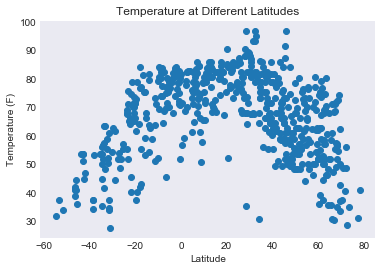

In [25]:
temp_df.to_csv('temperatures.csv')

temp_error_indexes = temp_df['Latitude'][temp_df['Latitude'] == 'NA'].index
cleaned_temp = temp_df.drop(temp_df.index[temp_error_indexes])

plt.scatter(cleaned_temp['Latitude'], cleaned_temp['temperature'])
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.title('Temperature at Different Latitudes')
sns.set_style("dark")

There's clearly a very strong inverse correlation between distance from the equator and temperature. As in, the closer you get to the equator, the hotter it gets. It seems that this trend is a bit stronger in the southern hemisphere.

## Humidity (%) vs. Latitude

In [12]:
hum_df = create_df(cities,'humidity',api_key)
hum_df.head()

,Latitude,humidity
0,-9.8,100
1,37.17,84
2,-54.81,100
3,-20.63,56
4,-51.62,86


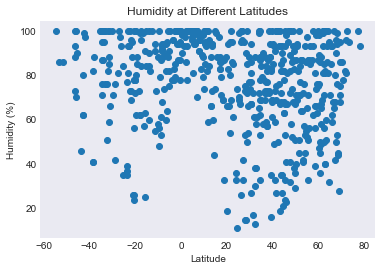

In [26]:
hum_df.to_csv('humidity.csv')

hum_error_indexes = hum_df['Latitude'][hum_df['Latitude'] == 'NA'].index
cleaned_hum = hum_df.drop(hum_df.index[hum_error_indexes])

plt.scatter(cleaned_hum['Latitude'], cleaned_hum['humidity'])
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Humidity at Different Latitudes')
sns.set_style("dark")

It appears that there is a slight correlation with higher humidity the closer you get to the equator, albeit far less strong that temperature correlation with latitude. Mostly it appears that this correlation starts around +/- 20 latitude. The closer you get from that point, the more humid it will be. However, further out than that, the humidity appears to have no correlation with latitude.

## Cloudiness (%) vs. Latitude

In [19]:
clouds_df = create_df(cities,'clouds',api_key)
clouds_df.head()

,Latitude,clouds
0,-9.8,92
1,37.17,64
2,-54.81,75
3,-20.63,48
4,-51.62,0


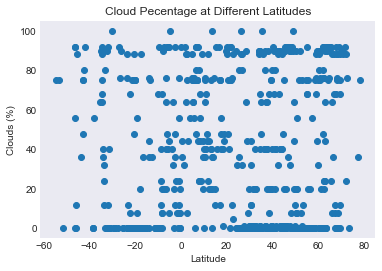

In [27]:
clouds_df.to_csv('clouds.csv')

clouds_error_indexes = clouds_df['Latitude'][clouds_df['Latitude'] == 'NA'].index
cleaned_clouds = clouds_df.drop(clouds_df.index[clouds_error_indexes])

plt.scatter(cleaned_clouds['Latitude'], cleaned_clouds['clouds'])
plt.xlabel('Latitude')
plt.ylabel('Clouds (%)')
plt.title('Cloud Pecentage at Different Latitudes')
sns.set_style("dark")

There is clearly no correlation between cloud percentage and different latitudes. However, the data looks discrete, as evidenced by the neat rows. The cloud density is probably estimated by percentages of 5 or 2.5.

## Wind Speed (mph) vs. Latitude

In [21]:
wind_df = create_df(cities,'wind',api_key)
wind_df.head()

,Latitude,wind
0,-9.8,19.39
1,37.17,12.35
2,-54.81,4.7
3,-20.63,5.97
4,-51.62,10.29


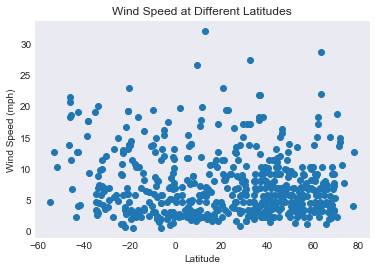

In [28]:
wind_df.to_csv('wind.csv')

wind_error_indexes = wind_df['Latitude'][wind_df['Latitude'] == 'NA'].index
cleaned_wind = wind_df.drop(wind_df.index[wind_error_indexes])

plt.scatter(cleaned_wind['Latitude'], cleaned_wind['wind'])
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Wind Speed at Different Latitudes')
sns.set_style("dark")

Clearly here, there is absolutely no correlation.